#Horoscopes and post-socialist countries

*Zsofia Gyarmathy*

*Sep 2018*

I aim to do a preliminary exploration of a friend's hypothesis to the effect that people in post-socialist countries may tend to believe in astrology and horoscopes more than those in non-post-socialist ones, a hypothesised reason for it being that it could be a kind of substitute for religion in the socialist era.

Since I couldn't find any studies on the topic to include Europe (the most widely-cited study, as far as I see, is a [Gallup study](https://news.gallup.com/poll/19558/paranormal-beliefs-come-supernaturally-some.aspx) done in the US, Canada and the UK), I resorted to [Google Trends](https://trends.google.com/trends/) as a proxy.

Procedure: 
1. I took the worldwide interest data from Google Trends on the topic "Horoscope" by region from between 2013-2018. 
2. I eliminated countries for which there were no data 
3. For each country, I encoded whether or not it was a [post-socialist country](https://en.wikipedia.org/wiki/List_of_former_communist_states_and_socialist_states). (1 = yes, 0 = no, 0.5 for Germany.)
4. I calculated the Pearson's correlation coefficient for the above two datasets, and tested it for significance.


In [2]:
import pandas as pd

# import Google Trends csv
trends = pd.read_csv(r'data/horoscope2013-2018.csv')
# ### or using a URL 
# ### (Sidenote: "?dl=1" must be appended to dropbox links!)
# trends = pd.read_csv('https://www.dropbox.com/s/pc1m1s0ndemcnwu/horoscope2013-2018.csv?dl=1')

# delete all rows with NaN values
trends = trends.dropna()

# short overview of dataframe
trends.describe()

,Horoscope: (9/26/13 - 9/26/18)
count,74.000000
mean,27.770270
std,21.238726
min,1.000000
25%,12.250000
50%,21.000000
75%,37.750000
max,100.000000


In [3]:
trends.head()

,Country,Horoscope: (9/26/13 - 9/26/18)
1,Montenegro,100.0
3,Serbia,83.0
6,Macedonia (FYROM),76.0
7,Romania,74.0
11,Moldova,63.0


The dataframe `trends` now encodes the following geomap (excluding N/A values):

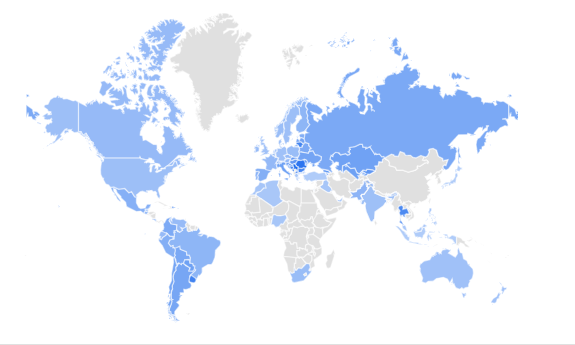

In [4]:
from IPython.display import Image
from IPython.core.display import HTML 
# Image(url="https://www.dropbox.com/s/l1m6s1i44bf0v11/googletrendshoroscopegeomaponly.png?dl=1")
Image(r"data/googletrendshoroscopegeomaponly.png")

In [5]:
# import csv with former socialist country info

socialist = pd.read_csv(r'data/former_soc.csv')
# socialist = pd.read_csv('https://www.dropbox.com/s/219y63g53fbc8a4/former_soc.csv?dl=1')
# merge trends and socialist dataframe info: 
df = trends.merge(socialist, on="Country")

# rename Horoscope column for brevitry
df.columns = ['horoscope_13_18' if i == 'Horoscope: (9/26/13 - 9/26/18)' else i for i in df.columns]

df.head(10)

,Country,horoscope_13_18,former_socialist
0,Montenegro,100.0,1.0
1,Serbia,83.0,1.0
2,Macedonia (FYROM),76.0,1.0
3,Romania,74.0,1.0
4,Moldova,63.0,1.0
5,Uruguay,62.0,0.0
6,Bosnia & Herzegovina,60.0,1.0
7,Bulgaria,60.0,1.0
8,Lithuania,60.0,1.0
9,Thailand,57.0,0.0


Creating a figure to visually check if post-socialist and non-post-socialist countries differ in their interest in the topic "horoscope" (as measured by Google Trends).

Text(0.5,1,'Interest in horoscopes based on Google Trends for post-socialist and other countries.')

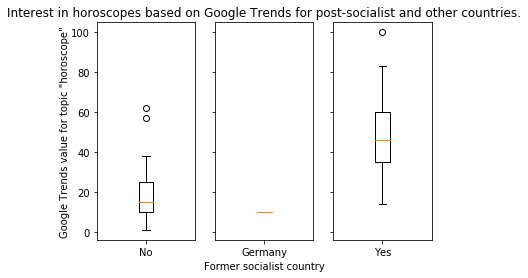

In [8]:
# creating separate Google Trend value data series depending on post-socialist status 
soc1 = df[df['former_socialist'] == 1]['horoscope_13_18']
soc0 = df[df['former_socialist'] == 0]['horoscope_13_18']
soc05 = df[df['former_socialist'] == 0.5]['horoscope_13_18']

import matplotlib.pyplot as plt

# create three boxplots in one figure
fig, (ax1, ax2, ax3)  = plt.subplots(1, 3, sharey='all')
ax1.boxplot(soc0)
ax2.boxplot(soc05)
ax3.boxplot(soc1)
# plt.tick_params(bottom=False)
ax1.set_xticklabels(['No'])
ax2.set_xticklabels(['Germany'])
ax3.set_xticklabels(['Yes'])
# dummy big subplot for x and y axis labelling 
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel("Former socialist country")
plt.ylabel('Google Trends value for topic "horoscope"')
plt.title('Interest in horoscopes based on Google Trends for post-socialist and other '
          'countries.')


## Checking correlation

Computing Pearson's correlation coefficient (between former socialist country status and Google Trends value for topic "horoscope") and testing it for significance (one-tailed t-test).

In [10]:
import numpy as np
import scipy.stats
corr_coeff = df['former_socialist'].corr(df['horoscope_13_18'], method='pearson')
N = np.sum(df['former_socialist'].notnull())
t_value = corr_coeff*np.sqrt((N-2)/(1-corr_coeff**2))
p_value = 1-scipy.stats.t.cdf(abs(t_value),N-2)  # one-tailed

The following statistics emerge:

In [11]:
print("r:\t{}\nN:\t{}\nt-value:\t{}\np-value:\t{}".format(
    corr_coeff, N, t_value, p_value))

r:	0.6593500038469977
N:	74
t-value:	7.441475680064291
p-value:	8.417055941123408e-11


## Discussion

There thus a **strong positive correlation** between popularity of the topic *horoscope* as measured on Google Trends (which could be assumed to be a proxy for belief in horoscopes) and former socialist country status. This correlation is **highly significant**, as p < 0.001.

**Some disclaimers/caveats:**

* Naturally, *no causal relation or qualitative explanation* can be inferred from any correlation. My aim here was only to check if there is any correlation between wider belief in astrology/horoscopes and post-socialist countries to begin with.

* While Google Trends may be a good enough proxy for want of other data sources, it is certainly not a substitute for an extensive poll, of course.

* There are a wide variety of paranormal beliefs (though a [2006 study](https://www.researchgate.net/publication/227779048_Paranormal_beliefs_Their_dimensionality_and_correlates) found that there seems to be a higher-order factor covering different kinds of paranormal beliefs, "indicating a general tendency to believe in paranormal phenomena"), but even focusing on belief in astrology and horoscopes, exploring just a single or even few topics on Google Trends may not be enough to conclusively capture what we are after.

* Searching for topics related to horoscopes does not entail a *belief* in them, of course. My working assumption was, however, that the majority of such searches for horoscopes comes from a desire to consult them, implying at least some amount of belief. (This is underpinned by the fact that there appears to be a recurring peak in interest in horoscopes at the end of each year according to Google Trends -- indicating that people tend to check their horoscopes for the upcoming year.) And given the huge amount of traffic handled by Google, I hope other motivations for such searches will not be affecting the results much. (Though it could theoretically happen that in Country A, for some reason, people became interested for sociological reasons in horoscopes without believing in them, skewing the results.)
